In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [8]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [9]:
num_attributes = df.select_dtypes(include=['int', 'float']).drop(columns='Exited')
cat_attributes = df.select_dtypes(exclude=['int','float'])

In [11]:
num_attributes.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


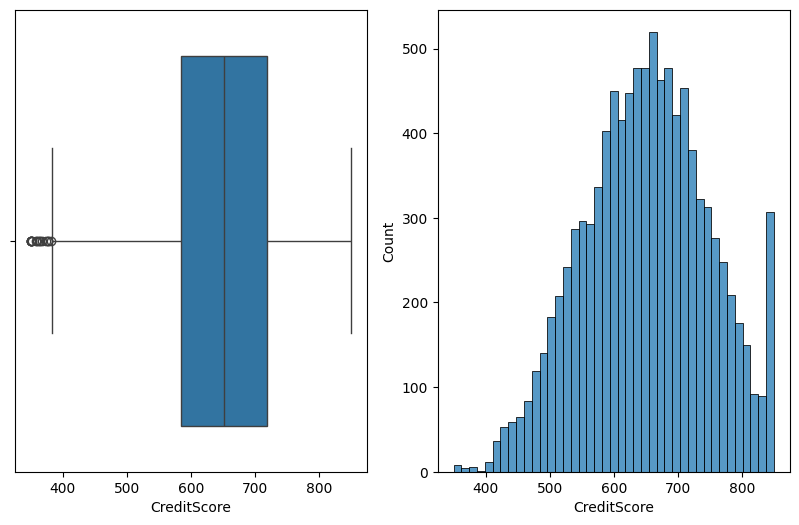

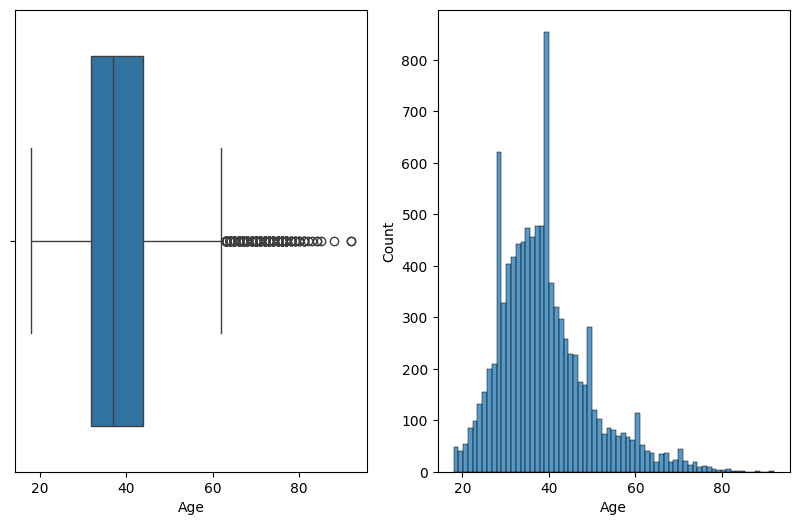

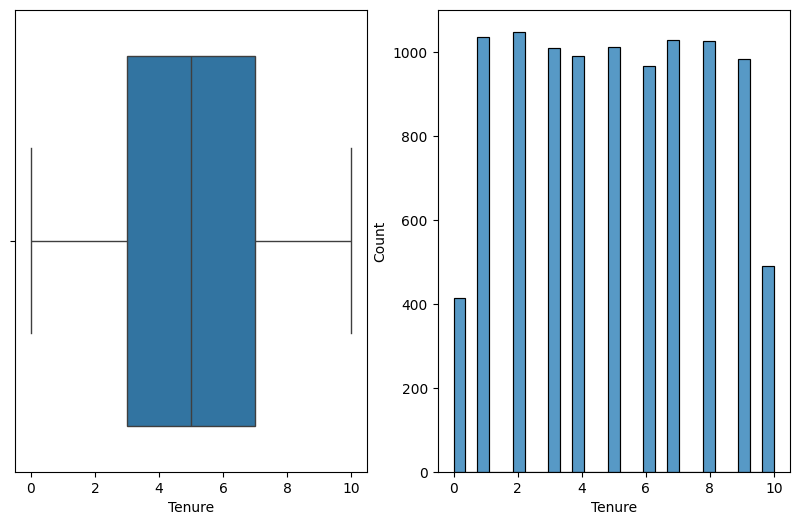

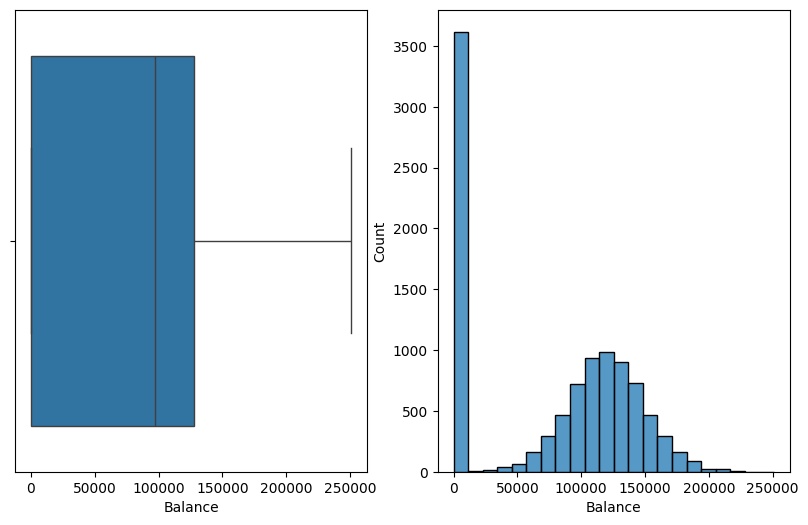

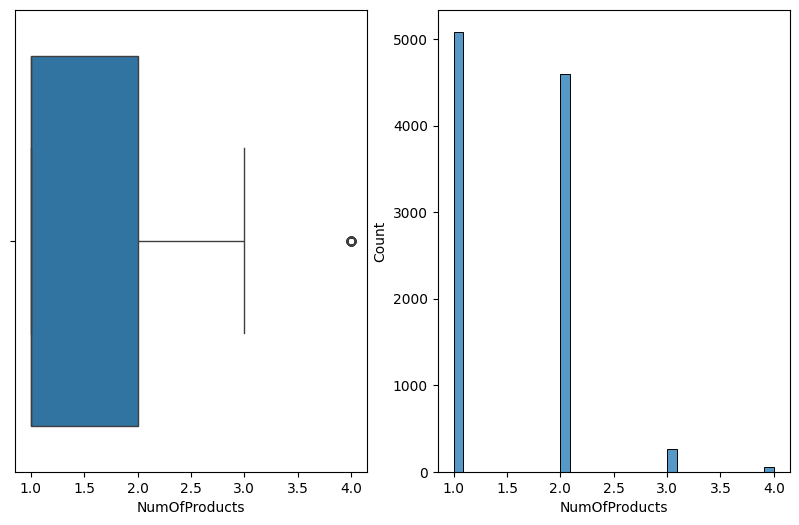

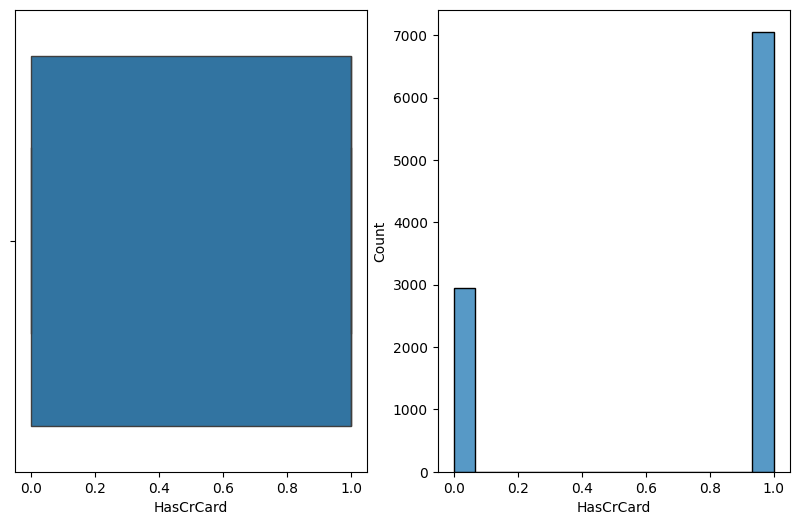

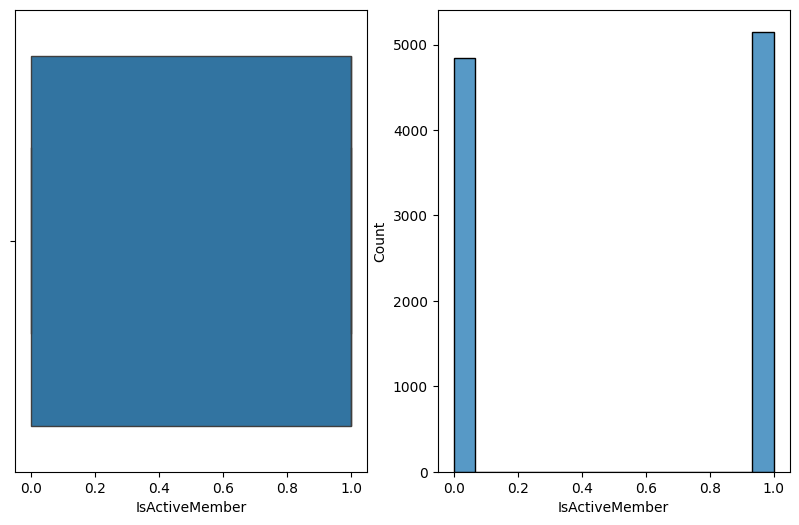

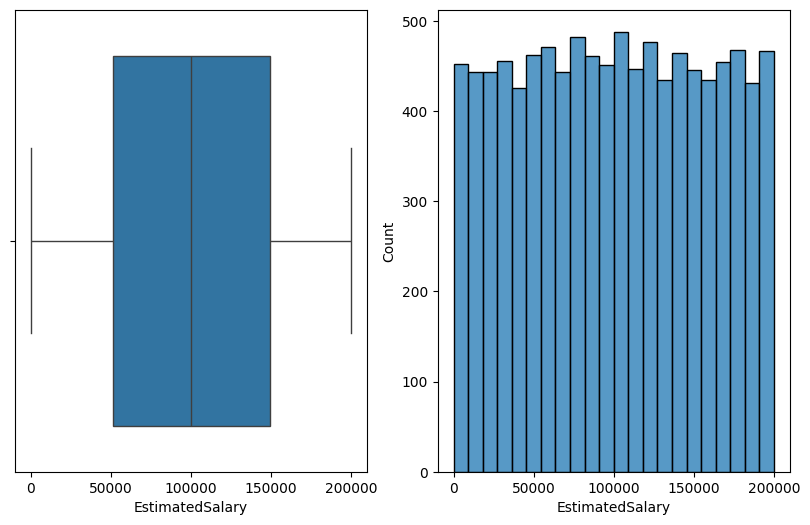

In [18]:
for col in num_attributes.columns:
  plt.figure(figsize=(10, 6))

  plt.subplot(1, 2, 1)
  sns.boxplot(x = col, data=df)

  plt.subplot(1, 2, 2)
  sns.histplot(x = col, data = df)


  plt.show()

In [19]:
num_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


In [14]:
cat_attributes.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


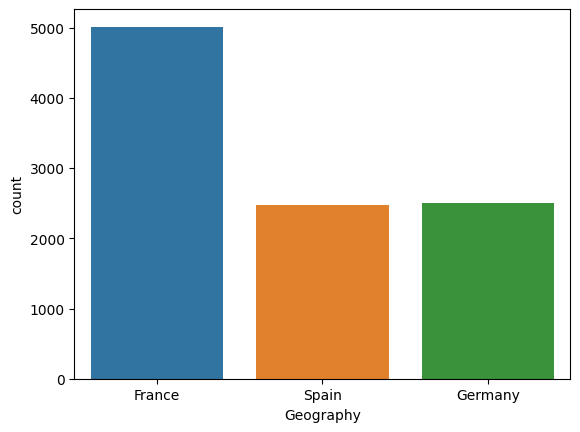

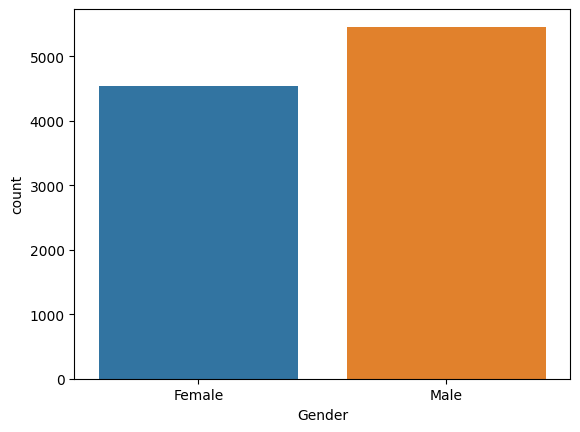

In [21]:
for col in cat_attributes.columns:
  sns.countplot(x = col,data = df, hue = col)
  plt.show()

In [15]:
for col in cat_attributes.columns:
  print(f"value counts for {col}")
  print(cat_attributes[col].value_counts())
  print('\n')


value counts for Geography
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


value counts for Gender
Gender
Male      5457
Female    4543
Name: count, dtype: int64




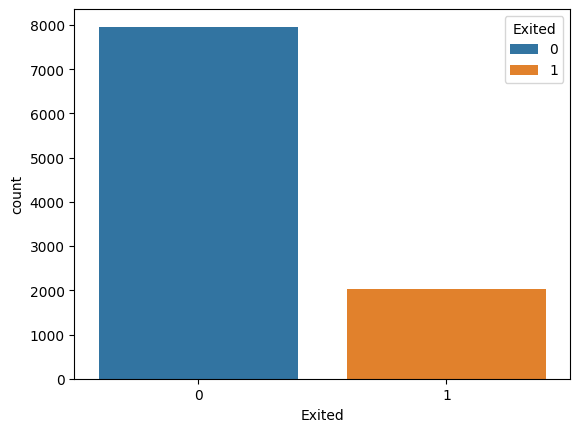

In [23]:
sns.countplot(x = 'Exited', data = df, hue = 'Exited')
plt.show()

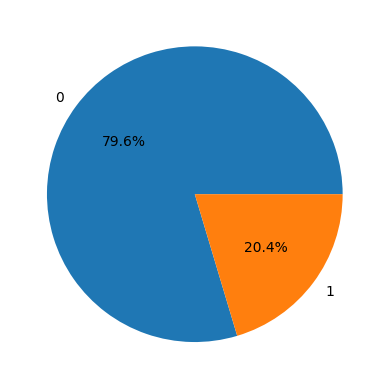

In [24]:
churn_counts = df['Exited'].value_counts(normalize=True)

plt.pie(churn_counts.values, labels = churn_counts.index, autopct = '%1.1f%%')
plt.show()

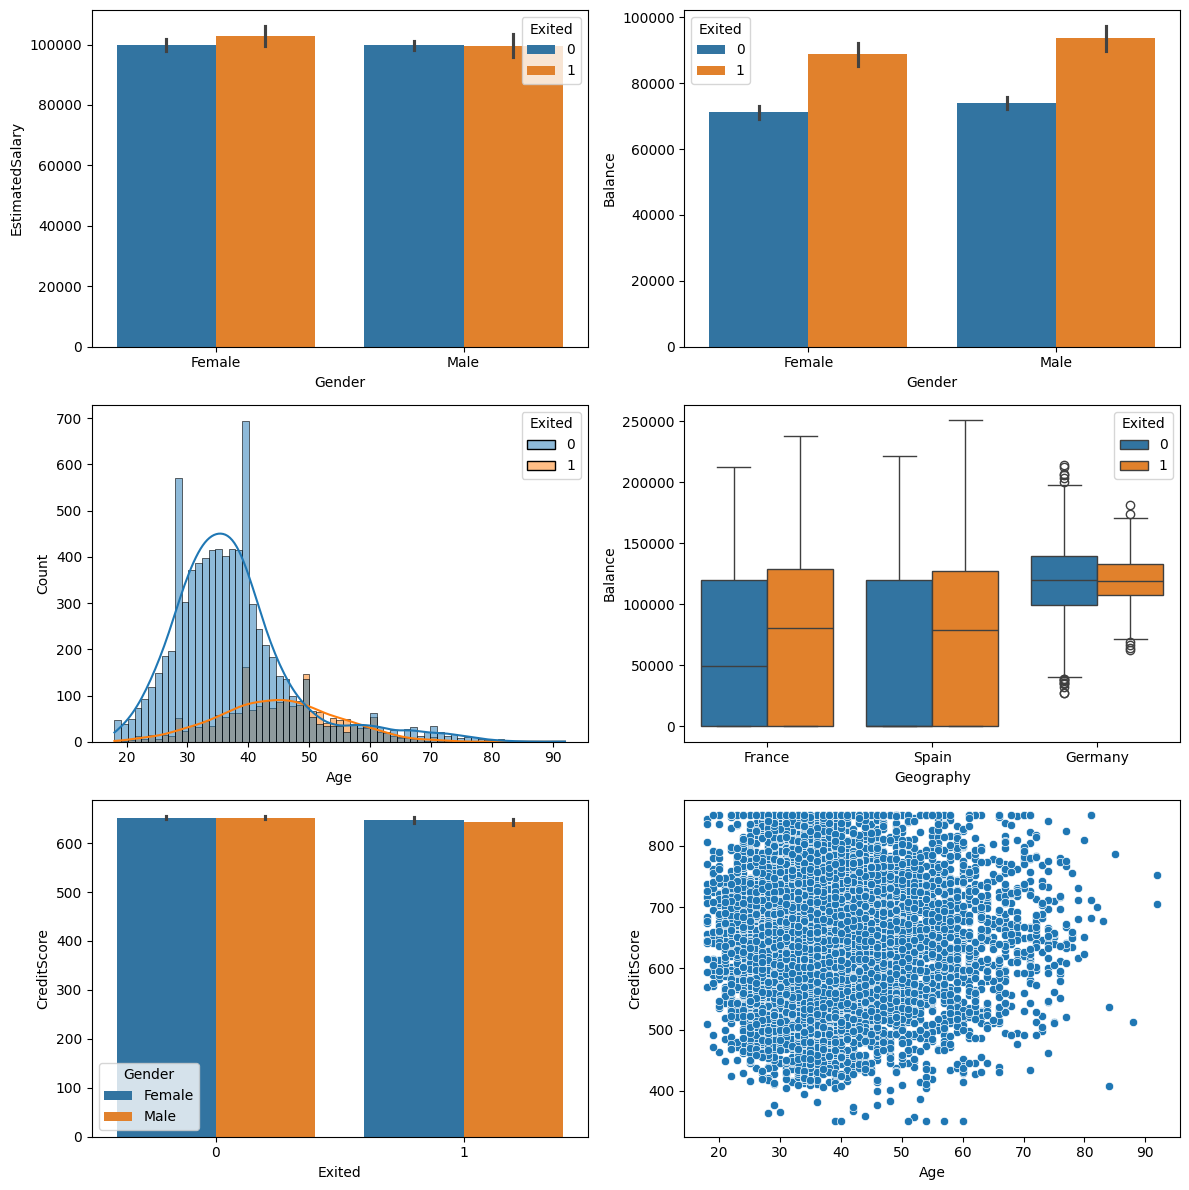

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.barplot(x = 'Gender', y = 'EstimatedSalary', hue='Exited', data = df, ax = axes[0, 0])
sns.barplot(x = 'Gender', y = 'Balance', hue='Exited', data = df, ax = axes[0, 1])
sns.histplot(x = 'Age', hue='Exited', kde=True, data = df, ax = axes[1, 0])
sns.boxplot(x = 'Geography', y = 'Balance', hue='Exited', data = df, ax= axes[1, 1])
sns.barplot(x = 'Exited', y = 'CreditScore', hue='Gender', data = df, ax = axes[2, 0])
sns.scatterplot(x = 'Age', y = 'CreditScore', data= df, ax = axes[2, 1])

plt.tight_layout()
plt.show()

In [26]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [27]:
def detect_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

for col in num_cols:
  outliers = detect_outliers(df, col)
  print(f"number of outliers in {col}:", len(outliers))

number of outliers in CreditScore: 15
number of outliers in Age: 359
number of outliers in Tenure: 0
number of outliers in Balance: 0
number of outliers in EstimatedSalary: 0


In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df = pd.get_dummies(df, columns=['Gender', 'Geography'], dtype = int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [31]:
X = df.drop(columns = 'Exited')
y = df['Exited']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [35]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
2151,1.058568,1.715086,0.684723,-1.226059,1,1,0,1.042084,0,1,1,0,0
8392,0.913626,-0.659935,-0.696202,0.413288,1,1,0,-0.623556,0,1,0,1,0
5006,1.079274,-0.184931,-1.731895,0.601687,2,1,1,0.308128,1,0,0,1,0
4117,-0.929207,-0.184931,-0.005739,-1.226059,2,1,0,-0.290199,0,1,1,0,0
7182,0.427035,0.955079,0.339492,0.548318,2,0,1,0.135042,0,1,0,1,0


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
pred_train = lg_model.predict(X_train)
pred_test = lg_model.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))


Training Accuracy Score:  0.81075
Testing Accuracy Score:  0.808


Precision:  0.5891472868217055
Recall:  0.18673218673218672
F1-Score:  0.2835820895522388
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix
[[1540   53]
 [ 331   76]]


In [37]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_train = dt_model.predict(X_train)
pred_test = dt_model.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))


Training Accuracy Score:  1.0
Testing Accuracy Score:  0.782


Precision:  0.46741573033707867
Recall:  0.5110565110565111
F1-Score:  0.48826291079812206
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1593
           1       0.47      0.51      0.49       407

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000

Confusion Matrix
[[1356  237]
 [ 199  208]]


In [38]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

Training Accuracy Score:  1.0
Testing Accuracy Score:  0.857


Precision:  0.7489711934156379
Recall:  0.44717444717444715
F1-Score:  0.56
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.75      0.45      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

Confusion Matrix
[[1532   61]
 [ 225  182]]


In [39]:
gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(X_train, y_train)
pred_train = gb_model.predict(X_train)
pred_test = gb_model.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))


Training Accuracy Score:  0.872125
Testing Accuracy Score:  0.869


Precision:  0.7821011673151751
Recall:  0.49385749385749383
F1-Score:  0.6054216867469879
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.78      0.49      0.61       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Confusion Matrix
[[1537   56]
 [ 206  201]]


In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights='distance')
pred_train = gb_model.predict(X_train)
pred_test = gb_model.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

Training Accuracy Score:  0.872125
Testing Accuracy Score:  0.869


Precision:  0.7821011673151751
Recall:  0.49385749385749383
F1-Score:  0.6054216867469879
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.78      0.49      0.61       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Confusion Matrix
[[1537   56]
 [ 206  201]]


In [40]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([0.62794349, 2.45398773])

In [44]:
lr = LogisticRegression(class_weight={0:0.62794349, 1:2.45398773})
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

Training Accuracy Score:  0.711125
Testing Accuracy Score:  0.7135


Precision:  0.38722826086956524
Recall:  0.7002457002457002
F1-Score:  0.49868766404199477
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000

Confusion Matrix
[[1142  451]
 [ 122  285]]


In [45]:
dt_model = DecisionTreeClassifier(class_weight={0:0.62794349, 1:2.45398773})
dt_model.fit(X_train, y_train)
pred_train = dt_model.predict(X_train)
pred_test = dt_model.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

Training Accuracy Score:  1.0
Testing Accuracy Score:  0.7775


Precision:  0.45476190476190476
Recall:  0.4692874692874693
F1-Score:  0.4619105199516324
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1593
           1       0.45      0.47      0.46       407

    accuracy                           0.78      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.78      0.78      0.78      2000

Confusion Matrix
[[1364  229]
 [ 216  191]]


In [46]:
rf_model = RandomForestClassifier(class_weight={0:0.62794349, 1:2.45398773}, random_state=42)
rf_model.fit(X_train, y_train)
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

Training Accuracy Score:  1.0
Testing Accuracy Score:  0.8555


Precision:  0.7610619469026548
Recall:  0.4226044226044226
F1-Score:  0.5434439178515008
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1593
           1       0.76      0.42      0.54       407

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Confusion Matrix
[[1539   54]
 [ 235  172]]


In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

params_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'sag', 'newton-cg'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [100, 200, 500, 1000],
    'class_weight': ['balanced',{0:0.62790406, 1:2.45459008}, None]
}
model = LogisticRegression()
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
gs_model = GridSearchCV(model, param_grid=params_grid, cv=skf, scoring='recall')
gs_model.fit(X_train, y_train)
print("best parameters of lg model are: ", gs_model.best_params_)
print("best score of lg model: ", gs_model.best_score_)

best parameters of lg model are:  {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
best score of lg model:  0.6834355828220859


In [48]:
params = {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

Training Accuracy Score:  0.7105
Testing Accuracy Score:  0.7145


Precision:  0.388283378746594
Recall:  0.7002457002457002
F1-Score:  0.49956178790534617
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000

Confusion Matrix
[[1144  449]
 [ 122  285]]


In [49]:
import pickle
filename = 'final_model.sav'
pickle.dump(lr, open(filename, 'wb'))